# ------------------ '(personality prediction)' ---------------------
### data link : "https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data"
# Project steps 
### 1) Understanding Data 
* a- Understand Columns
* b- check dtype 
* c- Describe Numerical Cols
* d- Describe Categorical Cols
* e- Catching any error
### 2) Data Cleaning "Handling any error" 
### 3) EXTRACT FEATURES + EDA ("Univariate Analysis" , "Bivariate Analysis") 
### 4) Pre-Processing Mind Map:
* a- Detect & Handle Duplicates
* b- train_test_split
* c- Detect & Handle NaNs
* d- Detect & Handle Outliers
* e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f- Imbalanced: X_train_resampled
* g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

#### 5) Modeling

* 1) Simple Model & Evaluate it's Performance
* 2) Bias vs Variance (Underfitting vs Overfitting)
* 3) GridSearch
* 4) Test Perforamnce
* 5) Save Model

In [1]:
# 📦 Data analysis and visualization libraries
import pandas as pd                            # For data loading and manipulation
import numpy as np                             # For numerical computations
import matplotlib.pyplot as plt                # For basic plotting
import seaborn as sns                          # For statistical plots
import plotly.express as px                    # For quick interactive plots
from plotly.subplots import make_subplots      # For subplotting in Plotly

# 🧹 Data preprocessing and cleaning
from datasist.structdata import detect_outliers        # To detect outliers in data
from sklearn.impute import SimpleImputer              # For missing value imputation (simple methods)
from sklearn.impute import KNNImputer                 # For missing value imputation (KNN-based)
from sklearn.preprocessing import RobustScaler,MinMaxScaler        # For scaling features robust to outliers
from sklearn.preprocessing import OneHotEncoder       # For encoding categorical features
from sklearn.compose import ColumnTransformer         # For applying transformers to specific columns

# ⚖️ Handling imbalanced data
from imblearn.over_sampling import SMOTE              # For oversampling minority class
from imblearn.under_sampling import RandomUnderSampler  # For undersampling majority class
from imblearn.pipeline import Pipeline                # Pipeline supporting sampling steps

# 🧪 Data splitting and cross-validation
from sklearn.model_selection import train_test_split      # For splitting data into train and test sets
from sklearn.model_selection import StratifiedKFold       # For stratified K-Fold cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict  # For cross-validation

# 🧮 Classification models
from sklearn.linear_model import LogisticRegression       # Logistic Regression model
from sklearn.svm import SVC                               # Support Vector Machine model
from sklearn.neighbors import KNeighborsClassifier        # K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier           # Decision Tree model
from sklearn.ensemble import RandomForestClassifier       # Random Forest model
from sklearn.ensemble import GradientBoostingClassifier   # Gradient Boosting model
from sklearn.ensemble import HistGradientBoostingClassifier  # Fast version of Gradient Boosting
from xgboost import XGBClassifier                         # XGBoost model
from catboost import CatBoostClassifier                   # CatBoost model

# 🔍 Model evaluation and tuning
from sklearn.model_selection import GridSearchCV          # For hyperparameter tuning
from sklearn.metrics import accuracy_score                # For calculating accuracy
from sklearn.metrics import classification_report         # For detailed classification performance
from sklearn.metrics import confusion_matrix              # For generating confusion matrix

# 💾 Saving and loading models
import joblib    

In [2]:
df = pd.read_csv("personality_dataset.csv")
df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.shape

(2900, 8)

# 1) Understanding Data 

### **a**- Understand Columns
- **Time_spent_Alone**: Hours spent alone daily (0–11)  
- **Stage_fear**: Presence of stage fright (Yes/No)  
- **Social_event_attendance**: Frequency of social events (0–10)  
- **Going_outside**: Frequency of going outside (0–7)  
- **Drained_after_socializing**: Feeling drained after socializing (Yes/No)  
- **Friends_circle_size**: Number of close friends (0–15)  
- **Post_frequency**: Social media post frequency (0–10)  
- **Personality**: Target variable (Extrovert/Introvert)

In [4]:
# b- check dtype 
for col in df.columns:
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    print(f"{col:<25} | Data Type: {dtype} | Missing Values: {missing}")

Time_spent_Alone          | Data Type: float64 | Missing Values: 63
Stage_fear                | Data Type: object | Missing Values: 73
Social_event_attendance   | Data Type: float64 | Missing Values: 62
Going_outside             | Data Type: float64 | Missing Values: 66
Drained_after_socializing | Data Type: object | Missing Values: 52
Friends_circle_size       | Data Type: float64 | Missing Values: 77
Post_frequency            | Data Type: float64 | Missing Values: 65
Personality               | Data Type: object | Missing Values: 0


In [5]:
# c- Describe Numerical Cols
df.select_dtypes("number").describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
# d- Describe Categorical Cols
for col in df.select_dtypes("object").columns :
    unique = df[col].unique()
    value_counts = df[col].value_counts(normalize=True)
    print(f"{col:<25} | unique Data: {unique:} | value_counts : {value_counts.to_dict()}")


Stage_fear                | unique Data: ['No' 'Yes' nan] | value_counts : {'No': 0.5012380615493456, 'Yes': 0.4987619384506544}
Drained_after_socializing | unique Data: ['No' 'Yes' nan] | value_counts : {'No': 0.5059691011235955, 'Yes': 0.4940308988764045}
Personality               | unique Data: ['Extrovert' 'Introvert'] | value_counts : {'Extrovert': 0.5141379310344828, 'Introvert': 0.48586206896551726}


In [7]:
# e- Catching errories
# 1 i have null nalues and i will hanel it at preprossing

# 3) EXTRACT FEATURES + EDA ("Univariate Analysis" , "Bivariate Analysis") 

In [8]:
mean_of_Time_spent_Alone_for_Introvert = df[df["Personality"] == "Introvert"]["Time_spent_Alone"].mean()
mean_of_Time_spent_Alone_for_Extrovert =  df[df["Personality"] == "Extrovert"]["Time_spent_Alone"].mean()


print(f"the mean of Time spent Alone for Introvert personality {mean_of_Time_spent_Alone_for_Introvert}")
print(f"the mean of Time spent Alone for Extrovert personality {mean_of_Time_spent_Alone_for_Extrovert}")

the mean of Time spent Alone for Introvert personality 7.0804347826086955
the mean of Time spent Alone for Extrovert personality 2.06726149622512


In [9]:
value_counts_to_Stage_fear_for_Introvert = df[df["Personality"] == "Introvert"]["Stage_fear"].value_counts(normalize=True).to_dict()
value_counts_to_Stage_fear_for_Extrovert = df[df["Personality"] == "Extrovert"]["Stage_fear"].value_counts(normalize=True).to_dict()

print(f"value counts to Stage fear for Introvert personality {value_counts_to_Stage_fear_for_Introvert}")
print(f"value counts to Stage fear for Extrovert personality {value_counts_to_Stage_fear_for_Extrovert}")

value counts to Stage fear for Introvert personality {'Yes': 0.9426705370101597, 'No': 0.057329462989840346}
value counts to Stage fear for Extrovert personality {'No': 0.9233954451345756, 'Yes': 0.07660455486542443}


In [10]:
mean_of_Social_event_attendance_for_Introvert = df[df["Personality"] == "Introvert"]["Social_event_attendance"].mean()
mean_of_Social_event_attendance_for_Extrovert =  df[df["Personality"] == "Extrovert"]["Social_event_attendance"].mean()


print(f"the mean of Social event attendance for Introvert personality {mean_of_Social_event_attendance_for_Introvert}")
print(f"the mean of Social event attendance for Extrovert personality {mean_of_Social_event_attendance_for_Extrovert}")

the mean of Social event attendance for Introvert personality 1.778909090909091
the mean of Social event attendance for Extrovert personality 6.016404647983595


In [11]:
mean_of_Going_outside_for_Introvert = df[df["Personality"] == "Introvert"]["Going_outside"].mean()
mean_of_Going_outside_for_Extrovert =  df[df["Personality"] == "Extrovert"]["Going_outside"].mean()


print(f"the mean of Going outside for Introvert personality {mean_of_Going_outside_for_Introvert}")
print(f"the mean of Going outside for Extrovert personality {mean_of_Going_outside_for_Extrovert}")

the mean of Going outside for Introvert personality 1.2728592162554426
the mean of Going outside for Extrovert personality 4.634615384615385


In [12]:
value_counts_to_Drained_after_socializing_for_Introvert = df[df["Personality"] == "Introvert"]["Drained_after_socializing"].value_counts(normalize=True).to_dict()
value_counts_to_Drained_after_socializing_for_Extrovert = df[df["Personality"] == "Extrovert"]["Drained_after_socializing"].value_counts(normalize=True).to_dict()

print(f"value counts to Drained_after_socializing for Introvert personality {value_counts_to_Drained_after_socializing_for_Introvert}")
print(f"value counts to Drained_after_socializing for Extrovert personality {value_counts_to_Drained_after_socializing_for_Extrovert}")


value counts to Drained_after_socializing for Introvert personality {'Yes': 0.9425454545454546, 'No': 0.05745454545454545}
value counts to Drained_after_socializing for Extrovert personality {'No': 0.924643584521385, 'Yes': 0.07535641547861507}


In [13]:
mean_of_Friends_circle_size_for_Introvert = df[df["Personality"] == "Introvert"]["Friends_circle_size"].mean()
mean_of_Friends_circle_size_for_Extrovert =  df[df["Personality"] == "Extrovert"]["Friends_circle_size"].mean()


print(f"the mean of Friends_circle_size for Introvert personality {mean_of_Friends_circle_size_for_Introvert}")
print(f"the mean of Friends_circle_size for Extrovert personality {mean_of_Friends_circle_size_for_Extrovert}")

the mean of Friends_circle_size for Introvert personality 3.196793002915452
the mean of Friends_circle_size for Extrovert personality 9.1736733287388


In [14]:
mean_of_Post_frequency_for_Introvert = df[df["Personality"] == "Introvert"]["Post_frequency"].mean()
mean_of_Post_frequency_for_Extrovert =  df[df["Personality"] == "Extrovert"]["Post_frequency"].mean()


print(f"the mean of Post_frequency for Introvert personality {mean_of_Post_frequency_for_Introvert}")
print(f"the mean of Post_frequency for Extrovert personality {mean_of_Post_frequency_for_Extrovert}")

the mean of Post_frequency for Introvert personality 1.3689179375453886
the mean of Post_frequency for Extrovert personality 5.638545953360768


## EXTRACT FEATURES

In [15]:
def from_str_to_int(str_column):
    if str_column == "No":
        return 0
    elif str_column == "Yes":
        return 1
    else :
        return np.nan

df["Stage_fear"] = df["Stage_fear"].apply(from_str_to_int)
df["Drained_after_socializing"] = df["Drained_after_socializing"].apply(from_str_to_int)

## **column** 1:- does the person spent time alone ('yes' or 'no')

In [16]:
piger_then_mean = df[df["Time_spent_Alone"] > df["Time_spent_Alone"].mean()]["Personality"].value_counts(normalize=True).to_dict()
smoler_then_mean = df[df["Time_spent_Alone"] <= df["Time_spent_Alone"].mean()]["Personality"].value_counts(normalize=True).to_dict()

print(f"x > mean {piger_then_mean}")
print(f"x <= mean {smoler_then_mean}")

x > mean {'Introvert': 0.9170692431561996, 'Extrovert': 0.08293075684380032}
x <= mean {'Extrovert': 0.8489028213166144, 'Introvert': 0.15109717868338557}


In [17]:
def spent_time_alone(column , mean):
    
    if mean < column :
        return 1
    else :
        return 0
    
df["does_the_person_spent_time_Alone"] = df["Time_spent_Alone"].apply(spent_time_alone , mean = df["Time_spent_Alone"].mean())


In [18]:
df[df["does_the_person_spent_time_Alone"] == 1]["Personality"].value_counts(normalize=True)

Introvert    0.917069
Extrovert    0.082931
Name: Personality, dtype: float64

## **column** 2:- does the person attendance Social event ('yes' or 'no')

In [19]:
piger_then_mean = df[df["Social_event_attendance"] > df["Social_event_attendance"].mean()]["Personality"].value_counts(normalize=True).to_dict()
smoler_then_mean = df[df["Social_event_attendance"] <= df["Social_event_attendance"].mean()]["Personality"].value_counts(normalize=True).to_dict()

print(f"x > mean {piger_then_mean}")
print(f"x <= mean {smoler_then_mean}")

x > mean {'Extrovert': 0.9447983014861996, 'Introvert': 0.055201698513800426}
x <= mean {'Introvert': 0.9101754385964912, 'Extrovert': 0.08982456140350877}


In [20]:
def Social_event_attendance(column , mean):
    
    if mean < column :
        return 1
    else :
        return 0

df["does_the_person_attendance"] = df["Social_event_attendance"].apply(Social_event_attendance , mean = df["Social_event_attendance"].mean())

In [21]:
df[df["does_the_person_attendance"] == 1]["Personality"].value_counts(normalize=True)

Extrovert    0.944798
Introvert    0.055202
Name: Personality, dtype: float64

## **column** 3:- does the person Going outside ('yes' or 'no')

In [22]:
piger_then_mean = df[df["Going_outside"] > df["Going_outside"].mean()]["Personality"].value_counts(normalize=True).to_dict()
smoler_then_mean = df[df["Going_outside"] <= df["Going_outside"].mean()]["Personality"].value_counts(normalize=True).to_dict()

print(f"x > mean {piger_then_mean}")
print(f"x <= mean {smoler_then_mean}")

x > mean {'Extrovert': 0.9363929146537843, 'Introvert': 0.06360708534621579}
x <= mean {'Introvert': 0.8159547738693468, 'Extrovert': 0.18404522613065327}


In [23]:
def Going_outside(column , mean):
    
    if mean < column :
        return 1
    else :
        return 0

df["does_the_person_Going_outside"] = df["Going_outside"].apply(Going_outside , mean = df["Going_outside"].mean())

In [24]:
df[df["does_the_person_Going_outside"] == 1]["Personality"].value_counts(normalize=True)

Extrovert    0.936393
Introvert    0.063607
Name: Personality, dtype: float64

## **column** 4:- does the person have pig Friends circle size ('yes' or 'no')

In [25]:
piger_then_mean = df[df["Friends_circle_size"] > df["Friends_circle_size"].mean()]["Personality"].value_counts(normalize=True).to_dict()
smoler_then_mean = df[df["Friends_circle_size"] <= df["Friends_circle_size"].mean()]["Personality"].value_counts(normalize=True).to_dict()

print(f"x > mean {piger_then_mean}")
print(f"x <= mean {smoler_then_mean}")

x > mean {'Extrovert': 0.9342881213142376, 'Introvert': 0.06571187868576242}
x <= mean {'Introvert': 0.7909535452322738, 'Extrovert': 0.20904645476772615}


In [26]:
def Friends_circle_size(column , mean):
    
    if mean < column :
        return 1
    else :
        return 0

df["does_have_pig_Friends_circle_size"] = df["Friends_circle_size"].apply(Friends_circle_size , mean = df["Friends_circle_size"].mean())

In [27]:
df[df["does_have_pig_Friends_circle_size"] == 1]["Personality"].value_counts(normalize=True)

Extrovert    0.934288
Introvert    0.065712
Name: Personality, dtype: float64

## **column** 5:- does the person shere many postes ('yes' or 'no')

In [28]:
piger_then_mean = df[df["Post_frequency"] > df["Post_frequency"].mean()]["Personality"].value_counts(normalize=True).to_dict()
smoler_then_mean = df[df["Post_frequency"] <= df["Post_frequency"].mean()]["Personality"].value_counts(normalize=True).to_dict()

print(f"x > mean {piger_then_mean}")
print(f"x <= mean {smoler_then_mean}")

x > mean {'Extrovert': 0.9403225806451613, 'Introvert': 0.05967741935483871}
x <= mean {'Introvert': 0.8169278996865204, 'Extrovert': 0.18307210031347962}


In [29]:
def Post_frequency(column , mean):
    
    if mean < column :
        return 1
    else :
        return 0

df["does_shere_many_postes"] = df["Post_frequency"].apply(Post_frequency , mean = df["Post_frequency"].mean())

In [30]:
df[df["does_shere_many_postes"] == 1]["Personality"].value_counts(normalize=True)

Extrovert    0.940323
Introvert    0.059677
Name: Personality, dtype: float64

## **column** 6:- is he isolated

In [31]:
def is_he_isolated(df):
    Stage_fear = df["Stage_fear"]
    Drained_after_socializing = df["Drained_after_socializing"]
    does_the_person_spent_time_Alone = df["does_the_person_spent_time_Alone"]
    does_the_person_attendance = 1 if df["does_the_person_attendance"] == 0 else 0
    does_the_person_Going_outside =  1 if df["does_the_person_Going_outside"] == 0 else 0
    does_have_pig_Friends_circle_size = 1 if df["does_have_pig_Friends_circle_size"] == 0 else 0
    does_shere_many_postes = 1 if df["does_shere_many_postes"] == 0 else 0

    return  (Stage_fear + 
            Drained_after_socializing +
            does_the_person_spent_time_Alone + 
            does_the_person_attendance +
            does_the_person_Going_outside +
            does_have_pig_Friends_circle_size +
            does_shere_many_postes)

df["Isolation_score"] = df.apply(is_he_isolated, axis=1)

In [32]:
df["Isolation_score"].value_counts()

7.0    1188
0.0     805
1.0     476
6.0     189
2.0     110
3.0       8
Name: Isolation_score, dtype: int64

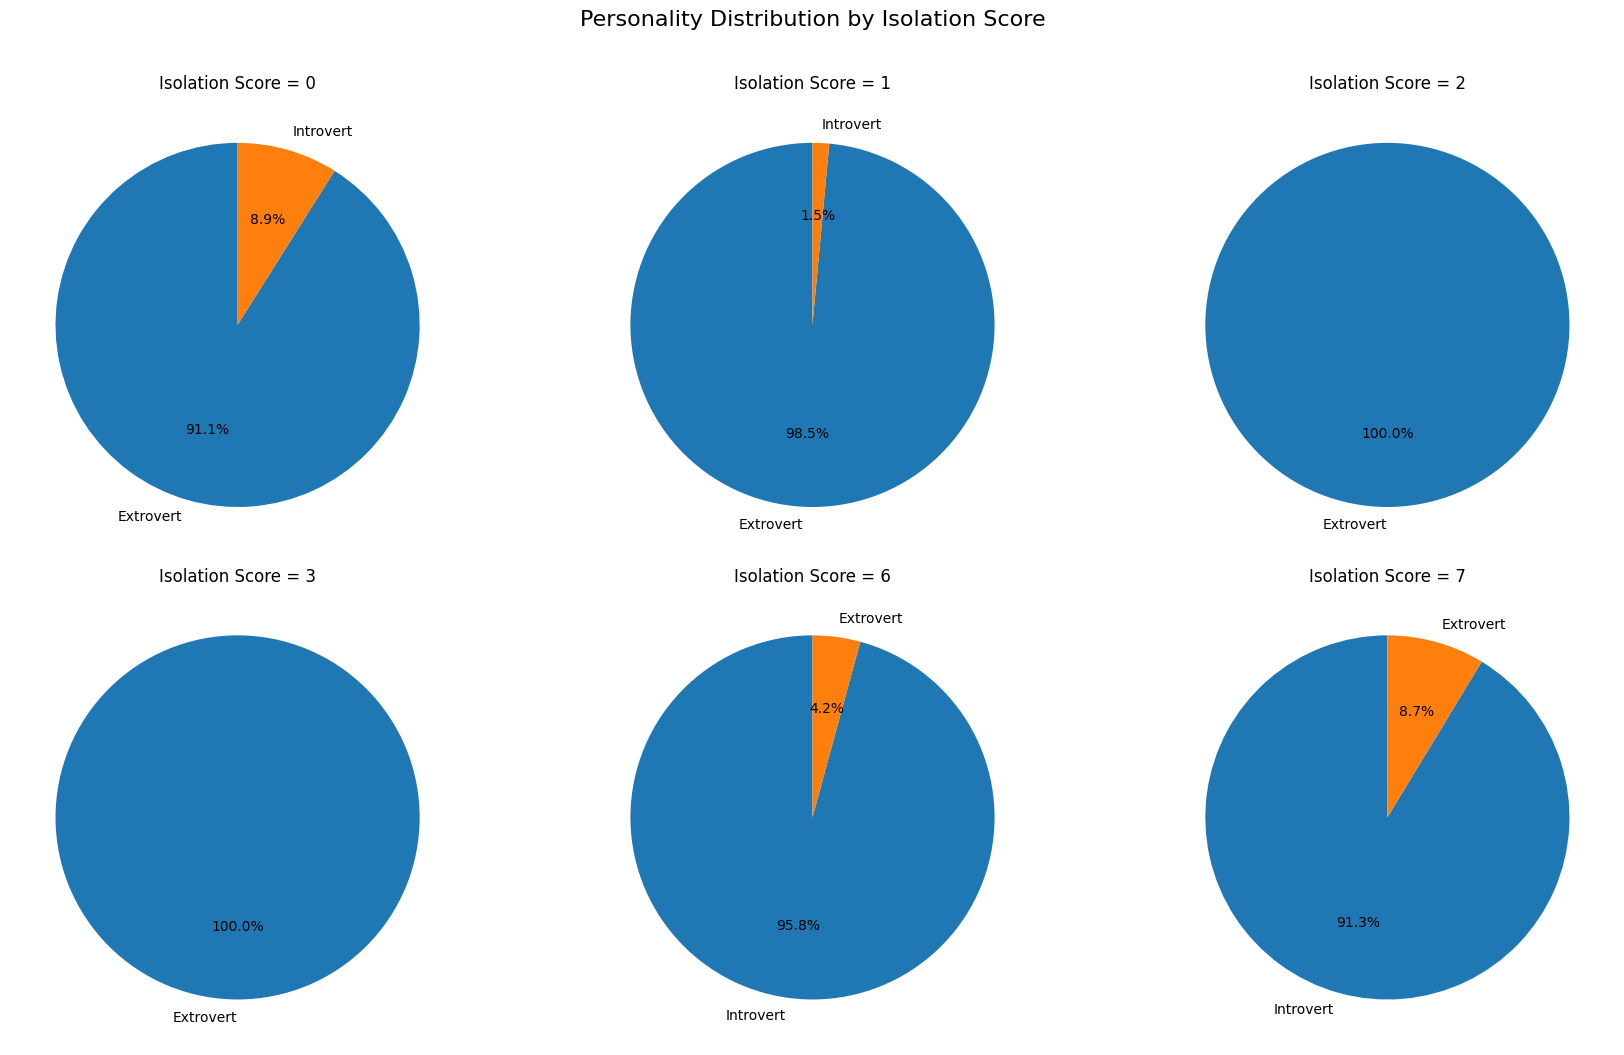

In [33]:
isolation_scores = [0, 1, 2, 3, 6, 7]

n = len(isolation_scores)


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()  


for i, score in enumerate(isolation_scores):
    data = df[df["Isolation_score"] == score]["Personality"].value_counts()
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Isolation Score = {score}')


plt.tight_layout()
plt.suptitle('Personality Distribution by Isolation Score', fontsize=16, y=1.05)
plt.show()

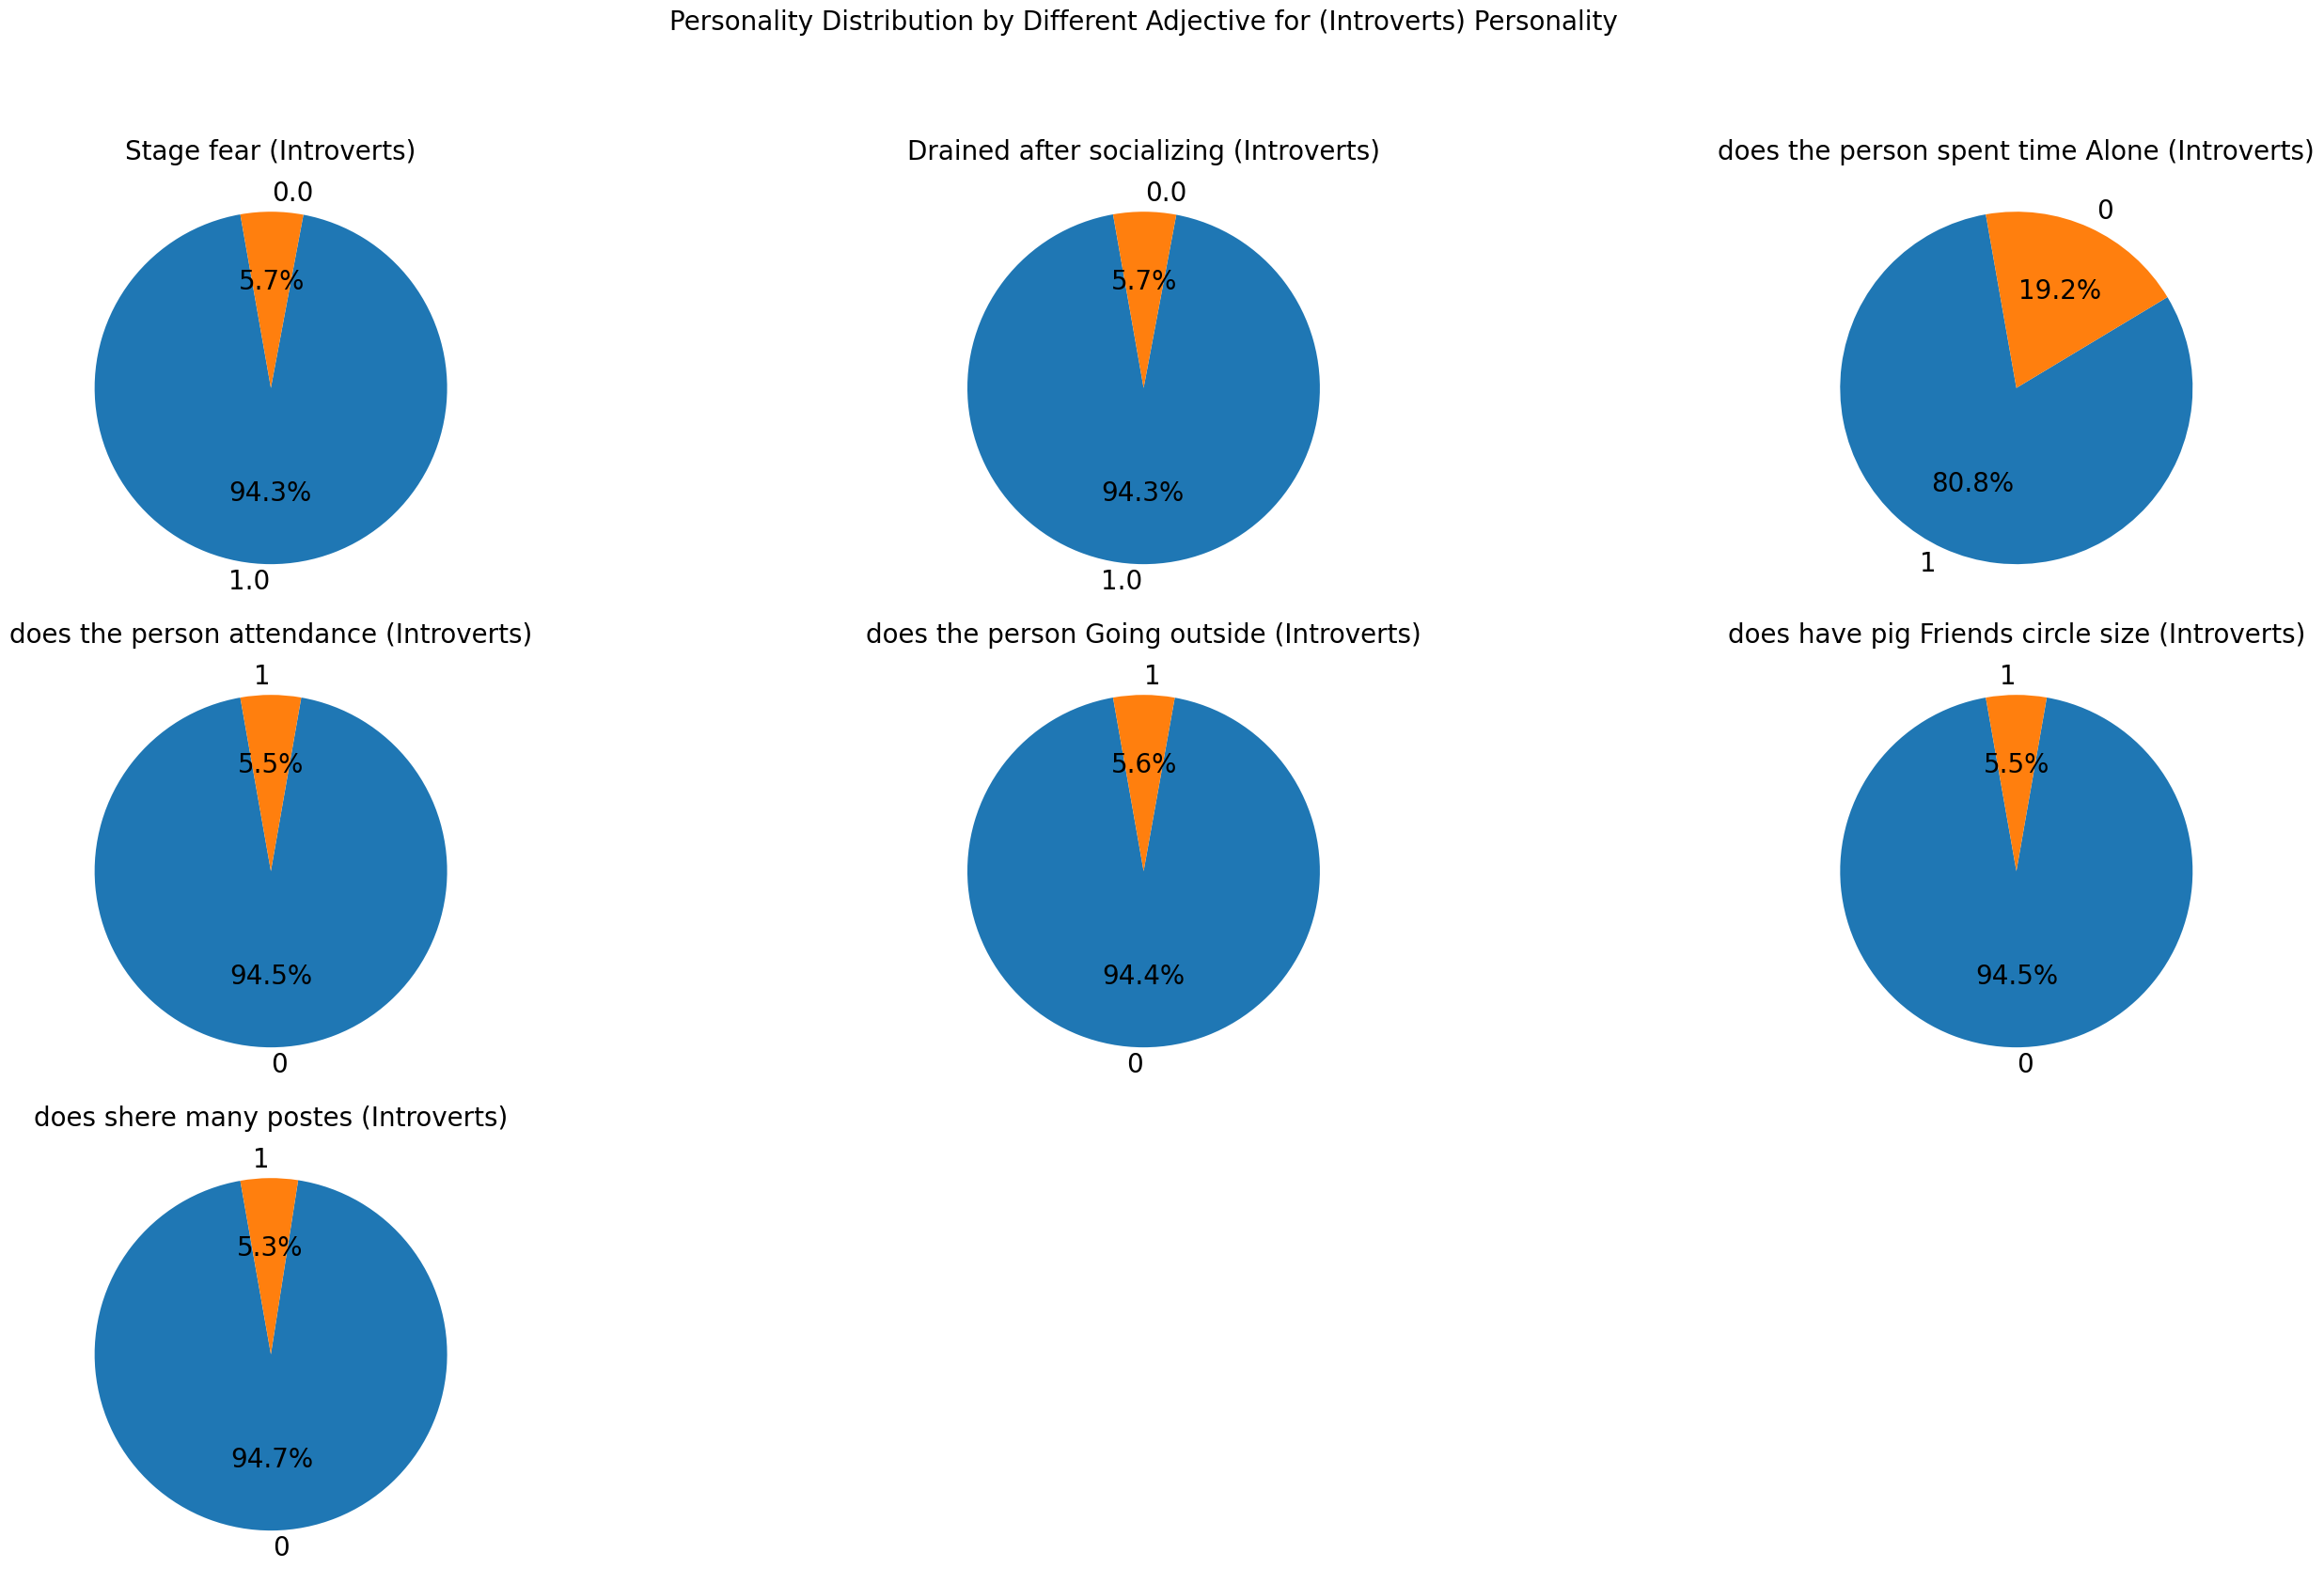

In [34]:
column_names = [
    "Stage_fear",
    "Drained_after_socializing",
    "does_the_person_spent_time_Alone",
    "does_the_person_attendance",
    "does_the_person_Going_outside",
    "does_have_pig_Friends_circle_size",  
    "does_shere_many_postes"
]


n = len(column_names)


fig, axs = plt.subplots(3, 3, figsize=(28, 16))
axs = axs.flatten()

for i, column in enumerate(column_names):
    if i < len(axs):
        data = df[df["Personality"] == "Introvert"][column].value_counts()
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=100 , textprops={'fontsize': 20})
        axs[i].set_title(f'{column.replace("_", " ")} (Introverts)', fontsize=20)


for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Personality Distribution by Different Adjective for (Introverts) Personality', fontsize=20, y=1.05)


plt.tight_layout()

plt.show()

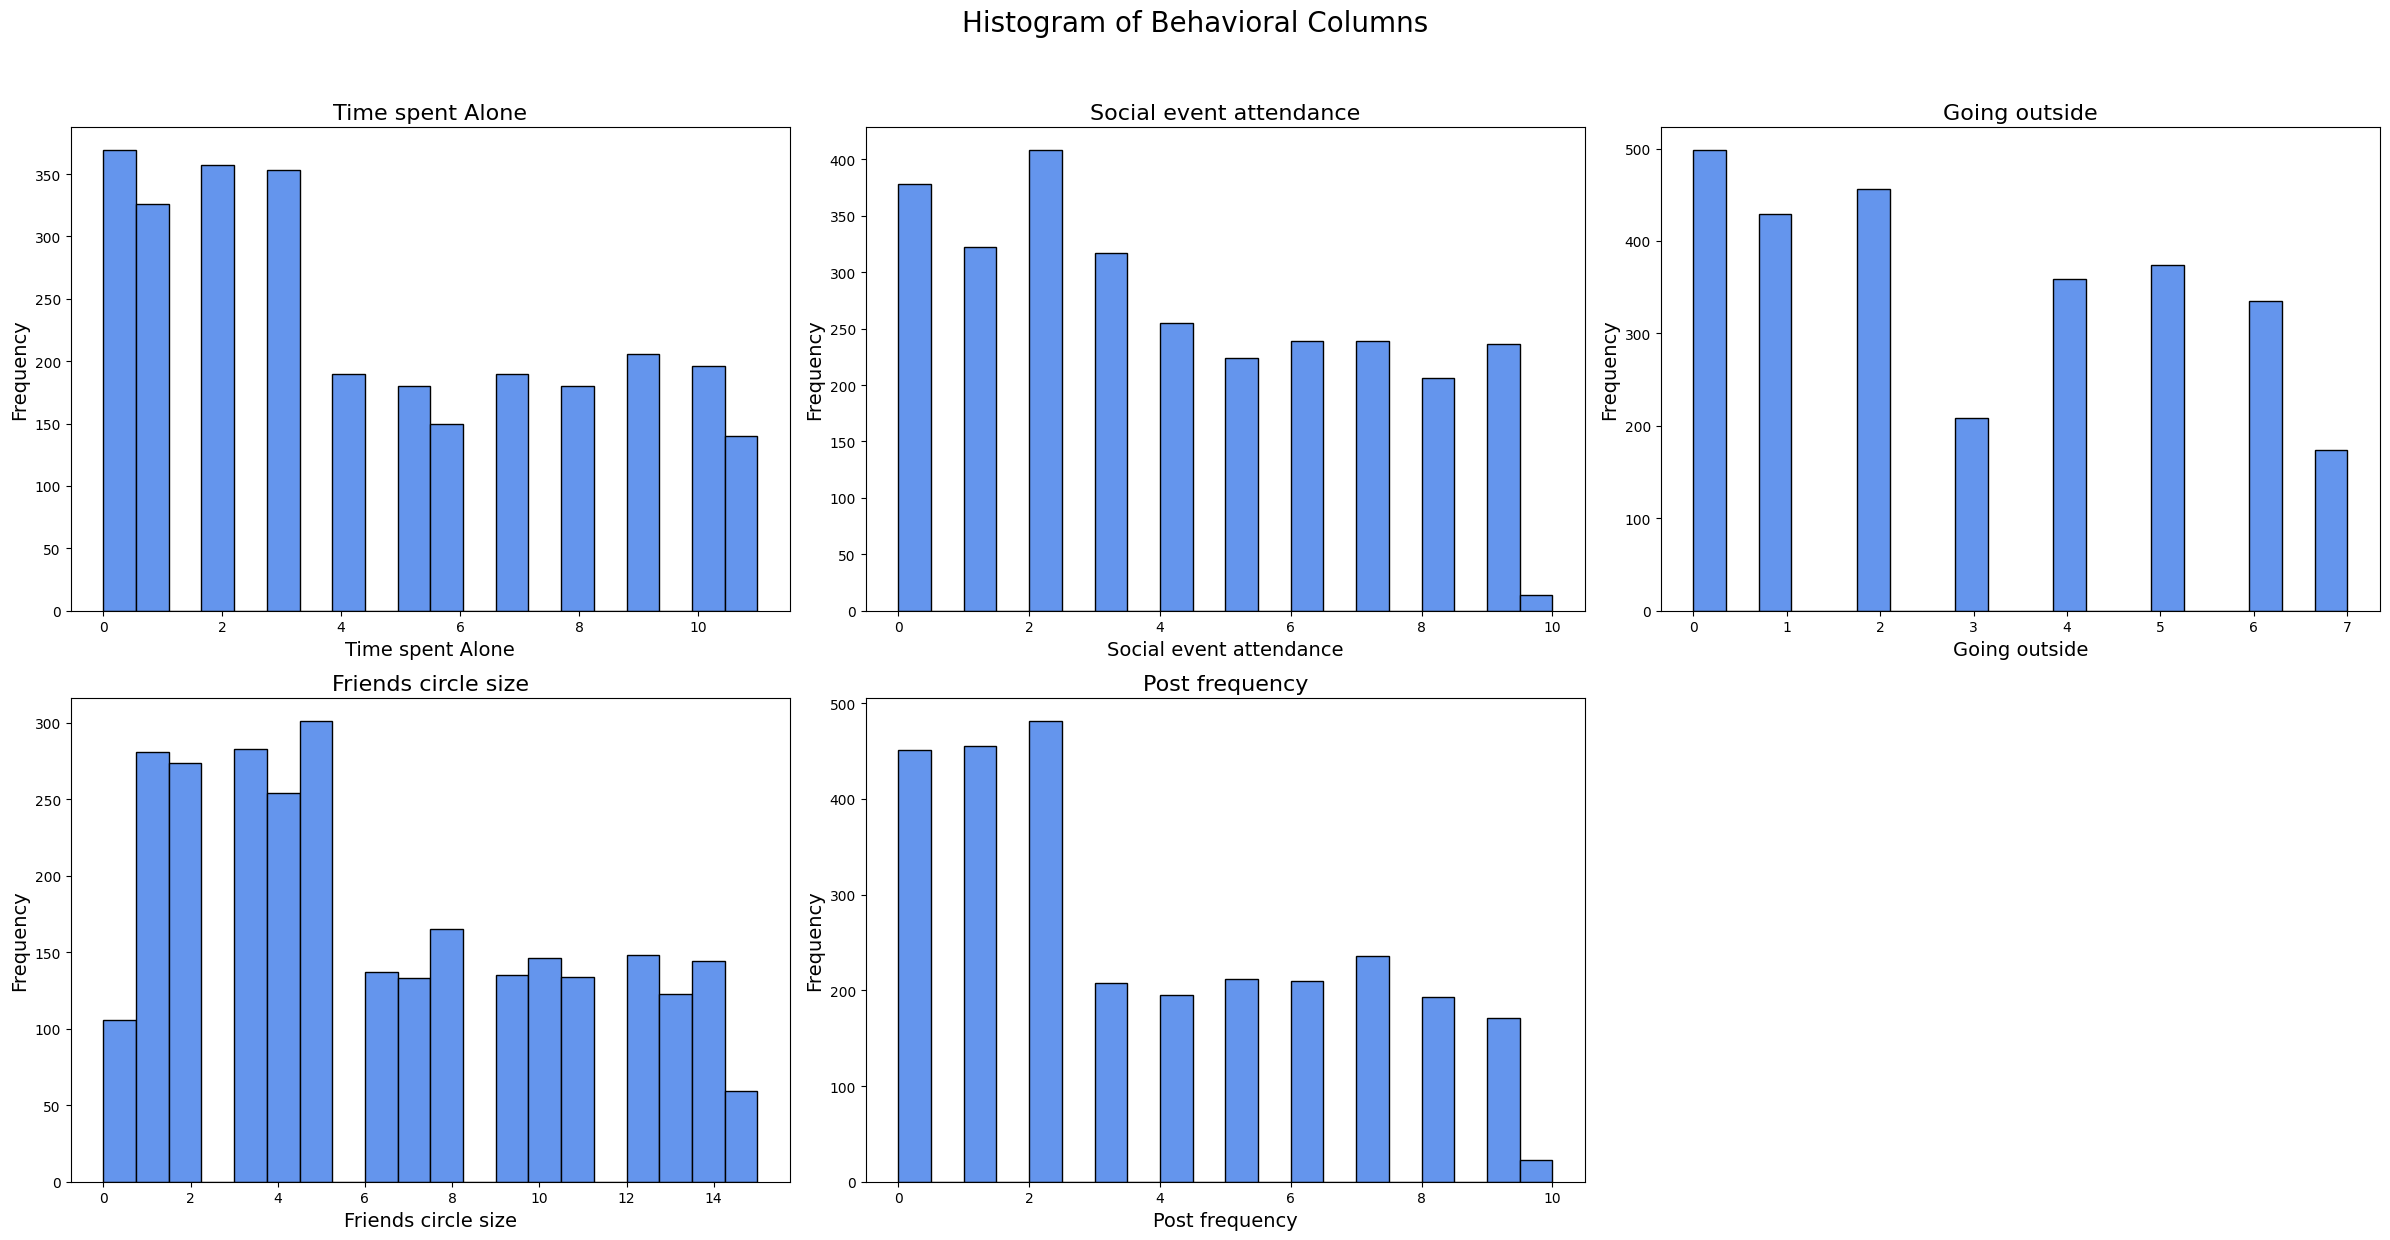

In [35]:
column_names = [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency"
]

fig, axs = plt.subplots(2, 3, figsize=(24, 12))
axs = axs.flatten()

for i, column in enumerate(column_names):
    if i < len(axs):
        axs[i].hist(df[column], bins=20, color='cornflowerblue', edgecolor='black')
        axs[i].set_title(f'{column.replace("_", " ")}', fontsize=16)
        axs[i].set_xlabel(column.replace("_", " "), fontsize=14)
        axs[i].set_ylabel("Frequency", fontsize=14)


for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])


plt.suptitle("Histogram of Behavioral Columns", fontsize=20, y=1.03)


plt.tight_layout()
plt.show()

In [36]:
df_long = df[column_names].melt(var_name='Feature', value_name='Value')

fig = px.box(df_long, x='Feature', y='Value', title='Box Plot for Each Feature')
fig.show()

In [37]:
fig1 = px.scatter(
    data_frame=df.dropna(subset=["Social_event_attendance", "Friends_circle_size"]),
    x="Social_event_attendance",
    y="Friends_circle_size",
    size="Social_event_attendance",
    trendline="ols",
    title="Line Plot: Social Event Attendance vs. Friends Circle Size"
)

fig2 = px.scatter(
    data_frame=df.dropna(subset=["Going_outside", "Post_frequency"]),
    x="Going_outside",
    y="Post_frequency",
    size="Going_outside",
    trendline="ols",
    title="Line Plot: Going Outside vs. Post Frequency"
)


fig = make_subplots(rows=2, cols=1, subplot_titles=(
    "Social Event Attendance vs. Friends Circle Size",
    "Going Outside vs. Post Frequency"
))

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)


for trace in fig2.data:
    fig.add_trace(trace, row=2, col=1)


fig.update_layout(height=800, width=800, title_text="Scatter Plots with Trendlines")
fig.show()

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Going_outside per Drained_after_socializing",
        "Friends_circle_size per Drained_after_socializing",
        "Social_event_attendance per Stage_fear",
        "Time_spent_Alone per Stage_fear"
    ]
)

for val in df["Drained_after_socializing"].dropna().unique():
    fig.add_trace(
        go.Box(y=df[df["Drained_after_socializing"] == val]["Going_outside"],
               name=val, boxmean=True),
        row=1, col=1
    )

for val in df["Drained_after_socializing"].dropna().unique():
    fig.add_trace(
        go.Box(y=df[df["Drained_after_socializing"] == val]["Friends_circle_size"],
               name=val, boxmean=True),
        row=1, col=2
    )

for val in df["Stage_fear"].dropna().unique():
    fig.add_trace(
        go.Box(y=df[df["Stage_fear"] == val]["Social_event_attendance"],
               name=val, boxmean=True),
        row=2, col=1
    )

for val in df["Stage_fear"].dropna().unique():
    fig.add_trace(
        go.Box(y=df[df["Stage_fear"] == val]["Time_spent_Alone"],
               name=val, boxmean=True),
        row=2, col=2
    )

fig.update_layout(height=800, width=1000, title_text="Distributions Comparison with Box Plots")
fig.show()

## 4) Pre-Processing Mind Map:
* a- Detect & Handle Duplicates
* b- train_test_split
* c- Detect & Handle NaNs
* d- Detect & Handle Outliers
* e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f- Imbalanced: X_train_resampled
* g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [39]:
# * a- Detect & Handle Duplicates
df.duplicated().sum() # = 388
df.drop_duplicates(inplace=True , ignore_index=True)

In [40]:
# * b- train_test_split

x = df.drop(columns=["Personality"])
y = df["Personality"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2009, 13), (503, 13), (2009,), (503,))

In [41]:
x.isnull().sum()

Time_spent_Alone                      61
Stage_fear                            73
Social_event_attendance               61
Going_outside                         65
Drained_after_socializing             51
Friends_circle_size                   75
Post_frequency                        63
does_the_person_spent_time_Alone       0
does_the_person_attendance             0
does_the_person_Going_outside          0
does_have_pig_Friends_circle_size      0
does_shere_many_postes                 0
Isolation_score                      123
dtype: int64

In [42]:
# c- Detect & Handle NaNs

imputer = KNNImputer(n_neighbors=5) 
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train) , columns=X_train.columns)

X_test = pd.DataFrame(imputer.transform(X_test) , columns=X_test.columns)

In [43]:
y.isna().sum()

0

In [44]:
# d- Detect & Handle Outliers
# i don't have Outliers

In [45]:
# e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
y_test =y_test.map({"Introvert": 1, "Extrovert": 0})
y_train =y_train.map({"Introvert": 1, "Extrovert": 0})

In [46]:
# g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled
columns_to_Scaling = ["Time_spent_Alone" , "Social_event_attendance" , "Going_outside" , "Friends_circle_size" , "Post_frequency" , "Isolation_score"]

Scaling_Pipeline = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ("Scaler" , MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('Scaling', Scaling_Pipeline, columns_to_Scaling),
], remainder='passthrough', force_int_remainder_cols=False)
preprocessor

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('Scaling',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', MinMaxScaler())]),
                                 ['Time_spent_Alone', 'Social_event_attendance',
                                  'Going_outside', 'Friends_circle_size',
                                  'Post_frequency', 'Isolation_score'])])

## 5) Modeling

* 1) Simple Model & Evaluate it's Performance
* 2) Bias vs Variance (Underfitting vs Overfitting)
* 3) GridSearch
* 4) Test Perforamnce
* 5) Save Model

In [47]:
# 1) Simple Model & Evaluate it's Performance

Logistic_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LogisticRegression(C=1, max_iter=1000, random_state=42, class_weight='balanced'))
    ])
Logistic_model.fit ( X_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Scaling',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency',
                                                   'Isolation_score'])])),
                ('regressor',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Performance

valid_acc = cross_val_score(Logistic_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {Logistic_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(Logistic_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")


Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


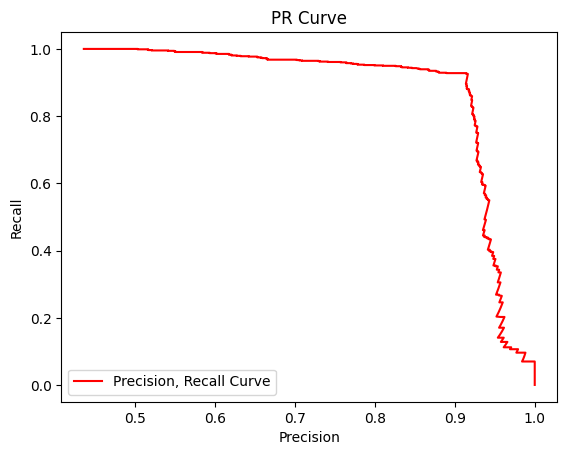

In [49]:
# determine best threshold
from sklearn.metrics import precision_recall_curve
# 
y_valid_scores = cross_val_predict(Logistic_model, X_train, y_train, cv=3, method='decision_function')
precision_scores, recall_scores, thresholds = precision_recall_curve(y_train, y_valid_scores)

plt.plot(precision_scores[:-1], recall_scores[:-1], c='red' , label="Precision, Recall Curve")
plt.title("PR Curve")
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# 2) Bias vs Variance (Underfitting vs Overfitting)
## Underfitting more complex model 

# KNeighborsClassifier

In [50]:
knn_Pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('knn', KNeighborsClassifier(p=2))
    ])

params = {
    'knn__n_neighbors': [3 , 5 , 7] ,
    'knn__weights' : ["uniform", "distance"] ,
    'knn__leaf_size' : [10 , 30]
}


knn_model = GridSearchCV(estimator=knn_Pipeline,
                            param_grid=params, cv=5, 
                            n_jobs=-1, verbose=1)

knn_model.fit(X_train , y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('Scaling',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Time_spent_Alone',
                                                                          'Social_event_attendance',
                                                                          'Going_outside',
                                                                          'Friends_circle_size',
                                                                          'Post_frequency',
                                                                          'Isolation_score'])])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [10, 30],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [51]:
# Performance
knn_model = knn_model.best_estimator_

valid_acc = cross_val_score(knn_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {knn_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(knn_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9298158287705326
validachan Accuracy: 0.9273247230183248
______________________________
[[1050   83]
 [  65  811]]
__________________________________________________
precision score : 0.9071588366890381
recall score : 0.9257990867579908
f1 score : 0.9163841807909604


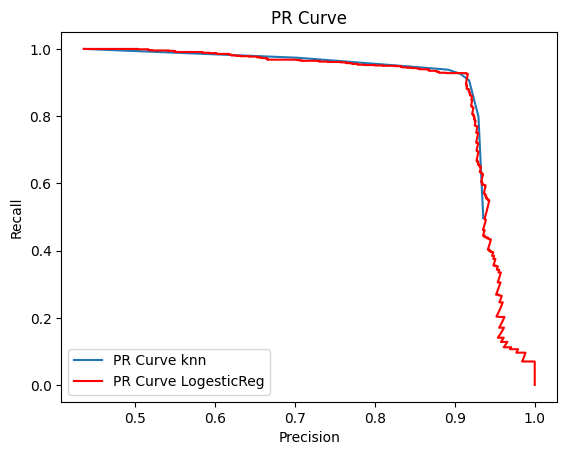

In [52]:

y_sgd_valid_scores_knn = cross_val_predict(knn_model, X_train, y_train, cv=3, method='predict_proba')

precision_sgd_scores_knn, recall_sgd_scores_knn, thresholds_sgd_knn = precision_recall_curve(y_train, y_sgd_valid_scores_knn[:, 1])



plt.plot(precision_sgd_scores_knn[:-1], recall_sgd_scores_knn[:-1], label='PR Curve knn')
plt.plot(precision_scores[:-1], recall_scores[:-1], c='red', label='PR Curve LogesticReg')
plt.title("PR Curve")
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [53]:
## ROC: Reciver Operating Characterstic
from sklearn.metrics import roc_curve, roc_auc_score

fpr_knn, tpr_knn, threshold_knn = roc_curve(y_train ,y_sgd_valid_scores_knn[:, 1]) # دي للمواديل الاول 
fpr_logestic_reg, tpr_logestic_reg, threshold_logestic_reg_roc = roc_curve(y_train, y_valid_scores) # دي للموديل التاني 

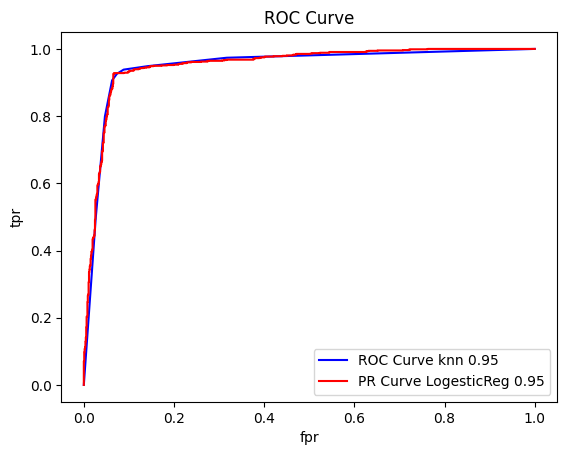

In [54]:
plt.plot(fpr_knn, tpr_knn, c='blue', label=f'ROC Curve knn {roc_auc_score(y_train, y_sgd_valid_scores_knn[:, 1]):.2f}')
plt.plot(fpr_logestic_reg, tpr_logestic_reg , c='red', label=f'PR Curve LogesticReg {roc_auc_score(y_train, y_valid_scores):.2f}')
plt.title("ROC Curve")
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

# GaussianNB

In [55]:
from sklearn.naive_bayes import GaussianNB

gnb_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('gnb', GaussianNB())
    ])
gnb_model.fit ( X_train , y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Scaling',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency',
                                                   'Isolation_score'])])),
                ('gnb', GaussianNB())])

In [56]:
valid_acc = cross_val_score(gnb_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {gnb_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(gnb_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


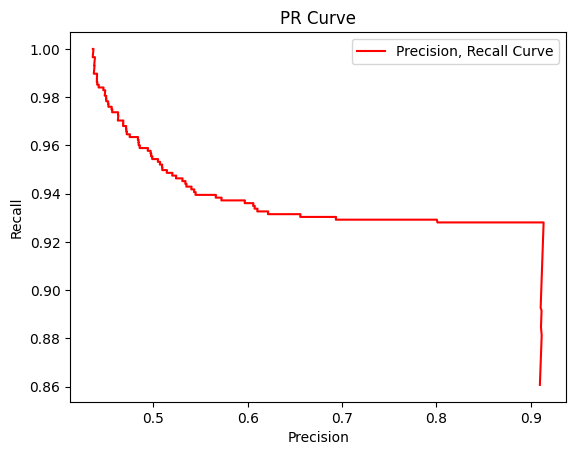

In [57]:
y_valid_scores = cross_val_predict(gnb_model, X_train, y_train, cv=3, method='predict_proba')
precision_scores, recall_scores, thresholds = precision_recall_curve(y_train, y_valid_scores[:,1])

plt.plot(precision_scores[:-1], recall_scores[:-1], c='red' , label="Precision, Recall Curve")
plt.title("PR Curve")
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# SVC

In [58]:
svc_Pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('svc', SVC(kernel="poly" ,coef0=1 , random_state=42))
    ])

params = {
    'svc__C': [1,4,6] ,
    'svc__degree': [2,4,6]
}


svc_model = GridSearchCV(estimator=svc_Pipeline,
                            param_grid=params, cv=5, 
                            n_jobs=-1, verbose=1)

svc_model.fit(X_train , y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('Scaling',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Time_spent_Alone',
                                                                          'Social_event_attendance',
                                                                          'Going_outside',
                                                                          'Friends_circle_size',
                                                                          'Post_frequency',
                                                                          'Isolation_score'])])),
                                       ('svc',
                                        SVC(coef0=1, kernel='poly',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 4, 6], 'svc__degree': [2, 4, 6]},
             verbose=1)

In [59]:
svc_model.best_params_

{'svc__C': 1, 'svc__degree': 2}

In [60]:
svc_model = svc_model.best_estimator_

In [61]:
valid_acc = cross_val_score(svc_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {svc_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(svc_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


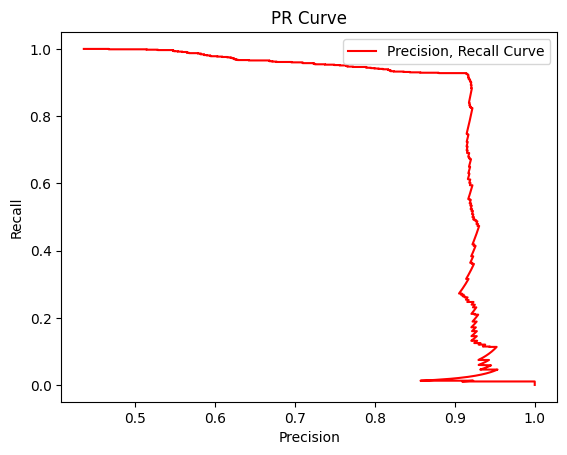

In [62]:
y_valid_scores = cross_val_predict(svc_model, X_train, y_train, cv=3, method='decision_function')
precision_scores_svc, recall_scores_svc, thresholds_svc = precision_recall_curve(y_train, y_valid_scores)

plt.plot(precision_scores_svc[:-1], recall_scores_svc[:-1], c='red' , label="Precision, Recall Curve")
plt.title("PR Curve")
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier


DecisionTree_Pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42 ))
    ])

params = {
    'tree__max_depth': [5,10] ,
    'tree__min_samples_split': [5,10 , 15] ,

}


DecisionTree_model = GridSearchCV(estimator=DecisionTree_Pipeline,
                            param_grid=params, cv=5, 
                            n_jobs=-1, verbose=1)

DecisionTree_model.fit(X_train , y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('Scaling',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Time_spent_Alone',
                                                                          'Social_event_attendance',
                                                                          'Going_outside',
                                                                          'Friends_circle_size',
                                                                          'Post_frequency',
                                                                          'Isolation_score'])])),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [5, 10],
                         'tree__min_samples_split': [5, 10, 15]},
             verbose=1)

In [64]:
DecisionTree_model = DecisionTree_model.best_estimator_

valid_acc = cross_val_score(DecisionTree_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {DecisionTree_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(DecisionTree_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9298122852073796
______________________________
[[1049   84]
 [  64  812]]
__________________________________________________
precision score : 0.90625
recall score : 0.9269406392694064
f1 score : 0.9164785553047404


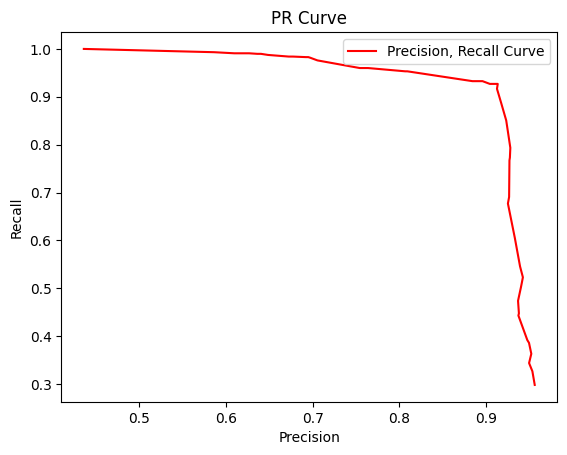

In [65]:
y_valid_scores = cross_val_predict(DecisionTree_model, X_train, y_train, cv=3, method='predict_proba')
precision_scores_DecisionTree, recall_scores_DecisionTree, thresholds_DecisionTree = precision_recall_curve(y_train, y_valid_scores[:,1])

plt.plot(precision_scores_DecisionTree[:-1], recall_scores_DecisionTree[:-1], c='red' , label="Precision, Recall Curve")
plt.title("PR Curve")
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# Ensambling learning

In [66]:
# voting with the beast three model 
# 1- svc_model 93 , 93 ,92
# 2- gnb_model 93 , 93 ,92
# 3- Logistic_model 93 , 93 ,92

from sklearn.ensemble import VotingClassifier
 
Voting_model = VotingClassifier(estimators=[
    ("svc_model" , svc_model),
    ("gnb_model" , gnb_model) ,
    ("Logistic_model" , Logistic_model)
])

Voting_model.fit(X_train , y_train)

VotingClassifier(estimators=[('svc_model',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(force_int_remainder_cols=False,
                                                                 remainder='passthrough',
                                                                 transformers=[('Scaling',
                                                                                Pipeline(steps=[('handle_nans',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('Scaler',
                                                                                                 MinMaxScaler())]),
                                                                                ['Time_spent_Alone',
                                                                                 'Social_event_attendance',
                                                                                 'Going_outside',
                                                                                 'Friends_circle_size',...
                                                                 remainder='passthrough',
                                                                 transformers=[('Scaling',
                                                                                Pipeline(steps=[('handle_nans',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('Scaler',
                                                                                                 MinMaxScaler())]),
                                                                                ['Time_spent_Alone',
                                                                                 'Social_event_attendance',
                                                                                 'Going_outside',
                                                                                 'Friends_circle_size',
                                                                                 'Post_frequency',
                                                                                 'Isolation_score'])])),
                                              ('regressor',
                                               LogisticRegression(C=1,
                                                                  class_weight='balanced',
                                                                  max_iter=1000,
                                                                  random_state=42))]))])

In [67]:
valid_acc = cross_val_score(Voting_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {Voting_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(Voting_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


In [68]:
# test score 
print(f"test score: {Voting_model.score(X_test, y_test)}")

y_test_pred = cross_val_predict(Voting_model, X_test, y_test, cv=3)

print(f"precision score : {precision_score(y_test, y_test_pred)}")
print(f"recall score : {recall_score(y_test, y_test_pred)}")
print(f"f1 score : {f1_score(y_test, y_test_pred)}")

test score: 0.9145129224652088
precision score : 0.8793103448275862
recall score : 0.9315068493150684
f1 score : 0.9046563192904656


In [69]:
for name,clf in Voting_model.named_estimators_.items():
    print(name ," = " ,clf.score(X_test, y_test))

svc_model  =  0.9145129224652088
gnb_model  =  0.9145129224652088
Logistic_model  =  0.9145129224652088


# bagging and pasting

In [70]:
from sklearn.ensemble import BaggingClassifier

Bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42 , max_depth=7) ,
                                    n_estimators=100 , max_samples=0.3 , # 30% of the data 
                                    bootstrap=True ,
                                    random_state=42)



bagging_Pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('bagging', Bagging_model)
    ])
bagging_Pipeline.fit(X_train , y_train)


valid_acc = cross_val_score(bagging_Pipeline, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {bagging_Pipeline.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(bagging_Pipeline, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9308113489298159
validachan Accuracy: 0.9278234761355317
______________________________
[[1054   79]
 [  66  810]]
__________________________________________________
precision score : 0.9111361079865017
recall score : 0.9246575342465754
f1 score : 0.9178470254957507


In [71]:
from sklearn.ensemble import RandomForestClassifier 

RandomForest_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('RandomForest_model',  RandomForestClassifier(random_state=42 , max_depth=7 
                                                   ,n_estimators=100 ,max_samples=0.3 
                                                   , bootstrap=True))
    ])

RandomForest_model.fit(X_train , y_train)

valid_acc = cross_val_score(RandomForest_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {RandomForest_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(RandomForest_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


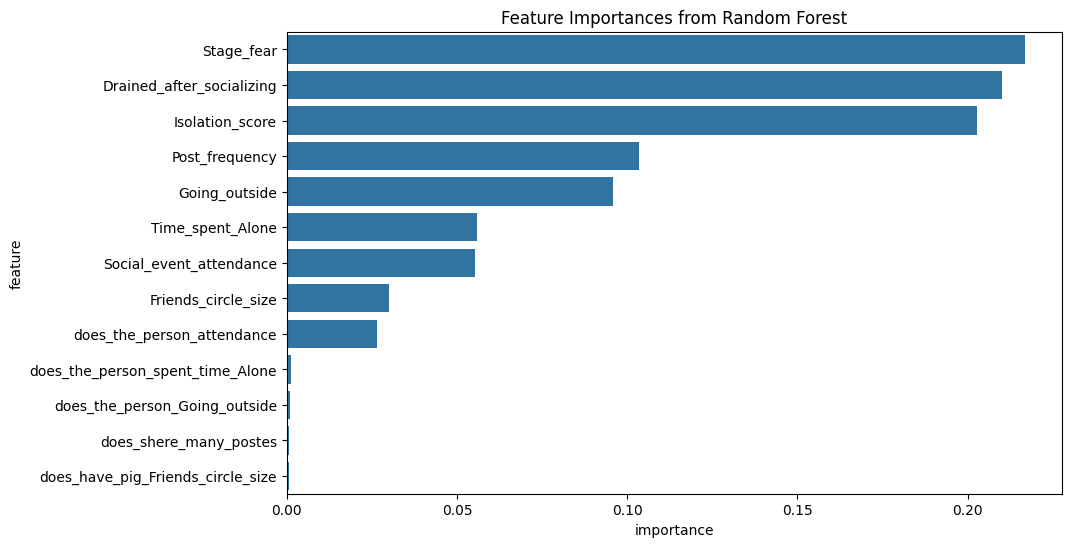

In [72]:
# Extract feature importances from the Random Forest inside the pipeline
importances = RandomForest_model.named_steps['RandomForest_model'].feature_importances_
feature_names = RandomForest_model.named_steps['preprocessing'].get_feature_names_out()

for feature in range(len(feature_names)):
    feature_names[feature] = feature_names[feature].split("__")[1]

# Create a DataFrame to display and sort feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importances from Random Forest')
plt.show()

# Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier 

GradientBoosting_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('GradientBoosting_model', GradientBoostingClassifier (random_state=42 , n_estimators=100 , subsample=0.4 , max_depth=1 , validation_fraction=0.1))
    ])


GradientBoosting_model.fit(X_train , y_train)


valid_acc = cross_val_score(GradientBoosting_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {GradientBoosting_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(GradientBoosting_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


In [74]:
HistGradientBoostin = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('HistGradientBoostin', HistGradientBoostingClassifier(random_state=42 , 
                                                           learning_rate=0.1 , max_iter=200 , 
                                                           max_depth=1 ,l2_regularization=1.0 ,
                                                           ))
    ])

HistGradientBoostin.fit(X_train ,y_train)

valid_acc = cross_val_score(HistGradientBoostin, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {HistGradientBoostin.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(HistGradientBoostin, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


In [75]:
CatBoost = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('CatBoost', CatBoostClassifier(random_state=42 , iterations=100 , learning_rate=0.1 , depth=5  , verbose=False))
    ])

CatBoost.fit(X_train ,y_train)

valid_acc = cross_val_score(CatBoost, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {CatBoost.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(CatBoost, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")


Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


In [76]:

XGB = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('XGB', XGBClassifier(eval_metric='logloss', random_state=42 ,n_estimators=300 , max_depth=1 , learning_rate=0.1 , subsample=0.8))
    ])

XGB.fit(X_train ,y_train)

valid_acc = cross_val_score(XGB, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {XGB.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(XGB, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")


Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


# staking 

In [77]:
from sklearn.ensemble import StackingClassifier

Stacking_model = StackingClassifier(estimators=[
    ("XGB" , XGB),
    ("CatBoost" , CatBoost),
    ("GradientBoosting_model" , GradientBoosting_model),
    ("Voting_model", Voting_model),
])


Stacking_model.fit(X_train , y_train)

StackingClassifier(estimators=[('XGB',
                                Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(force_int_remainder_cols=False,
                                                                   remainder='passthrough',
                                                                   transformers=[('Scaling',
                                                                                  Pipeline(steps=[('handle_nans',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('Scaler',
                                                                                                   MinMaxScaler())]),
                                                                                  ['Time_spent_Alone',
                                                                                   'Social_event_attendance',
                                                                                   'Going_outside',
                                                                                   'Friends_circle_size',
                                                                                   'Pos...
                                                                                                 remainder='passthrough',
                                                                                                 transformers=[('Scaling',
                                                                                                                Pipeline(steps=[('handle_nans',
                                                                                                                                 SimpleImputer(strategy='median')),
                                                                                                                                ('Scaler',
                                                                                                                                 MinMaxScaler())]),
                                                                                                                ['Time_spent_Alone',
                                                                                                                 'Social_event_attendance',
                                                                                                                 'Going_outside',
                                                                                                                 'Friends_circle_size',
                                                                                                                 'Post_frequency',
                                                                                                                 'Isolation_score'])])),
                                                                              ('regressor',
                                                                               LogisticRegression(C=1,
                                                                                                  class_weight='balanced',
                                                                                                  max_iter=1000,
                                                                                                  random_state=42))]))]))])

In [78]:
valid_acc = cross_val_score(Stacking_model, X_train , y_train, cv=5, scoring='accuracy')
print(f"Train Accuracy: {Stacking_model.score(X_train, y_train)}")
print(f"validachan Accuracy: {np.mean(valid_acc)}")
print("_"*30)

y_valid_pred = cross_val_predict(Stacking_model, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_valid_pred))

print("_"*50)

print(f"precision score : {precision_score(y_train, y_valid_pred)}")
print(f"recall score : {recall_score(y_train, y_valid_pred)}")
print(f"f1 score : {f1_score(y_train, y_valid_pred)}")

Train Accuracy: 0.9303135888501742
validachan Accuracy: 0.9303110383245865
______________________________
[[1056   77]
 [  63  813]]
__________________________________________________
precision score : 0.9134831460674158
recall score : 0.928082191780822
f1 score : 0.9207248018120046


# test score

In [79]:
test_v = cross_val_score(Stacking_model, X_test , y_test, cv=5, scoring='accuracy')
print(f"test Accuracy: {Stacking_model.score( X_test , y_test)}")
print(f"validachan test Accuracy: {np.mean(test_v)}")
print("_"*30)


y_valid_pred_test = cross_val_predict(Stacking_model, X_test , y_test, cv=3)
print(f"precision score : {precision_score(y_test, y_valid_pred_test)}")
print(f"recall score : {recall_score(y_test, y_valid_pred_test)}")
print(f"f1 score : {f1_score(y_test, y_valid_pred_test)}")

test Accuracy: 0.9145129224652088
validachan test Accuracy: 0.9144950495049505
______________________________
precision score : 0.8793103448275862
recall score : 0.9315068493150684
f1 score : 0.9046563192904656


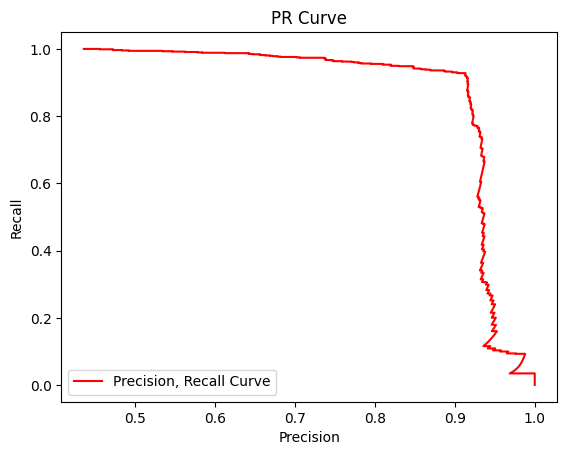

In [80]:
y_valid_scores = cross_val_predict(Stacking_model, X_train, y_train, cv=3, method='predict_proba')
precision_scores, recall_scores, thresholds = precision_recall_curve(y_train, y_valid_scores[:,1])

plt.plot(precision_scores[:-1], recall_scores[:-1], c='red' , label="Precision, Recall Curve")
plt.title("PR Curve")
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [81]:
# saving the model 

joblib.dump(Stacking_model, 'personality_model.pkl')

['personality_model.pkl']